<h1> Exploratory Data Analysis <h1/>

<h3> DB Connection SQL Server <h3/>

In [2]:

# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import folium
from folium.plugins import HeatMap

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

#DB-Connection
driver = '{ODBC Driver 17 for SQL Server}' # This might be a different version on your system
server = 'ANNINAYOGA\SQLEXPRESS'
database = 'Immo'
username = 'immoadmin'
password = 'zhaw$1234'
connection_string = f"DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

#Connection and SQL-Query for table property
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM property"
df_property = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

#Connection and SQL-Query for table location
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM location"
df_location = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

# Querying the cleaned property table
# Pfad zur CSV-Datei angeben
file_path = r'C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience\filtered_property_location_clean.csv'

try:
    # Versuche, die CSV-Datei einzulesen mit dem spezifizierten Trennzeichen und Fehlerbehandlung
    df_filtered_property_location_clean = pd.read_csv(file_path, sep=';', quotechar='"', on_bad_lines='skip')
except Exception as e:
    print("Ein Fehler ist aufgetreten:", e)

C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience


In [2]:
    num_entries = len(df_filtered_property_location_clean)
    print("Anzahl der Einträge:", num_entries)

Anzahl der Einträge: 8995


<h3>DB Connection MYSQL<h3/>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from sqlalchemy import create_engine

# Database connection details
db_config = {
    'host': '127.0.0.1',
    'port': '13306',
    'user': 'admin',
    'password': 'admin123',
    'database': 'immo'
}

# Create the engine
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}")

# Querying the property table
query_property = "SELECT * FROM Property"
df_property = pd.read_sql(query_property, engine)

# Querying the location table
query_location = "SELECT * FROM Location"
df_location = pd.read_sql(query_location, engine)

ModuleNotFoundError: No module named 'mysql'

<h3>Data Cleansing<h3/>

In [10]:
#OBSOLETE
#Data Cleansing - run before EDA

# Performing a inner join on the two DataFrames to filter data which do not exist on location due to connection issues
#df_filtered_property_location = pd.merge(df_property, df_location,on='LocationId', how='inner')

# filter out records with empty strings in the 'Rooms' column - new dataframe: df_filtered_property_location_clean
#df_filtered_property_location_clean = df_filtered_property_location[df_filtered_property_location['Rooms'].notna()]

#Filter where ObjectType != Einzelzimmer, Estrichabteil, Hobbyraum or Kellerabteil
#df_filtered_property_location_clean = df_filtered_property_location[(df_filtered_property_location['ObjectType'] != 'Einzelzimmer') & (df_filtered_property_location['ObjectType'] != 'Estrichabteil') & (df_filtered_property_location['ObjectType'] != 'Hobbyraum') & (df_filtered_property_location['ObjectType'] != 'Kellerabteil')]

#Check ObjectTypes - Einzelzimmer, Estrichabteil, Hobbyraum or Kellerabteil are filtered
#df_filtered_property_location_clean.groupby("ObjectType").size()

# filter out records with empty strings in the 'Rooms' and 'SquareMeters' column
#df_filtered_property_location_clean = df_filtered_property_location.dropna(subset=['Rooms', 'SquareMeter'])

#Check for empty records
#df_filtered_property_location_clean.isnull().sum()

#after detecting outliers: check manually for noisy data (if not valid (selling house instead of renting), deleted the record in the df df_filtered_property_location_clean
#ids_to_remove = ['4000895043','4000834270','4000895759','3003516605','4000910516','4000956535','4000924121','4000975051','4000888412','4000945522','4000869481','4000969667','4000838419','4000870455','4000904681','4000931326','4000969684','4000969684','4000797599','4000897187','4000969553','4000969553','4000965774','4000962388','4000969516','4000906960']  
#df_filtered_property_location_clean = df_filtered_property_location_clean[~df_filtered_property_location_clean['ListingId'].isin(ids_to_remove)]

#Index: should have 9000 entries after running this code-snippet
#df_filtered_property_location_clean.info()


<h2>EDA<h2/>

In [7]:
#Summary statistics of numeric variables
df_filtered_property_location_clean.describe()

,ListingId,Rooms,SquareMeter,Price,AdditionalCost,NetPrice,zip,longitude,latitude,bfs_number,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
count,8.995000e+03,8995.000000,8995.000000,8995.000000,7530.000000,8092.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,3.944653e+09,3.607560,92.238243,2128.323735,241.070784,1870.930672,5317.283936,8.062808,47.068457,3324.248027,138.680145,118.684193,138.836231,118.712098,5.591440,1.661812,10.201556,24.232967
std,2.435590e+08,1.302769,45.780306,1361.003418,102.174749,1235.528969,2645.633410,0.890471,0.491939,2049.459618,75.001222,70.543987,74.916342,70.514043,4.196125,2.218277,20.807433,10.188650
min,1.081471e+08,1.000000,9.000000,140.000000,1.000000,80.000000,1000.000000,5.974333,45.832144,1.000000,50.000000,25.000000,50.000000,25.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000731e+09,2.500000,66.000000,1460.000000,180.000000,1260.000000,3011.000000,7.427721,46.818188,1509.000000,99.000000,76.050000,99.000000,76.050000,2.000000,0.000000,1.000000,18.398113
50%,4.000864e+09,3.500000,85.000000,1820.000000,230.000000,1590.000000,5033.000000,8.056475,47.238493,3203.000000,105.000000,108.000000,105.000000,108.000000,5.000000,1.000000,3.000000,21.875000
75%,4.000933e+09,4.500000,108.000000,2350.000000,290.000000,2050.000000,8050.000000,8.845561,47.438185,5171.000000,155.000000,141.000000,155.000000,141.000000,8.000000,2.000000,9.000000,27.037037
max,4.000977e+09,15.000000,680.000000,25000.000000,2550.000000,20000.000000,9657.000000,10.336857,47.785978,6812.000000,335.000000,525.000000,335.000000,525.000000,27.000000,18.000000,202.000000,228.000000


In [8]:
#Skewness
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].skew()

Price           4.973414
Rooms           0.942203
SquareMeter     2.998926
Price_per_m2    3.515527
dtype: float64

In [9]:
#Kurtosis
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].kurtosis()

Price           43.357637
Rooms            4.407364
SquareMeter     20.570338
Price_per_m2    30.238607
dtype: float64

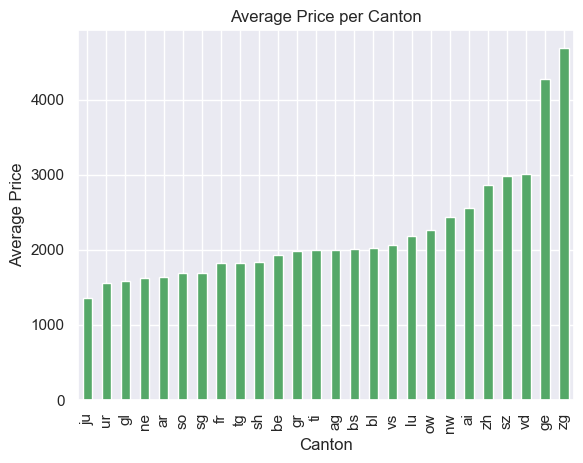

In [3]:
#Barplot average price / canton

average_prices = df_filtered_property_location_clean.groupby('Canton')['Price'].mean().sort_values()
average_prices.plot(kind='bar',color='g')
plt.title('Average Price per Canton')
plt.xlabel('Canton')
plt.ylabel('Average Price')

plt.show()


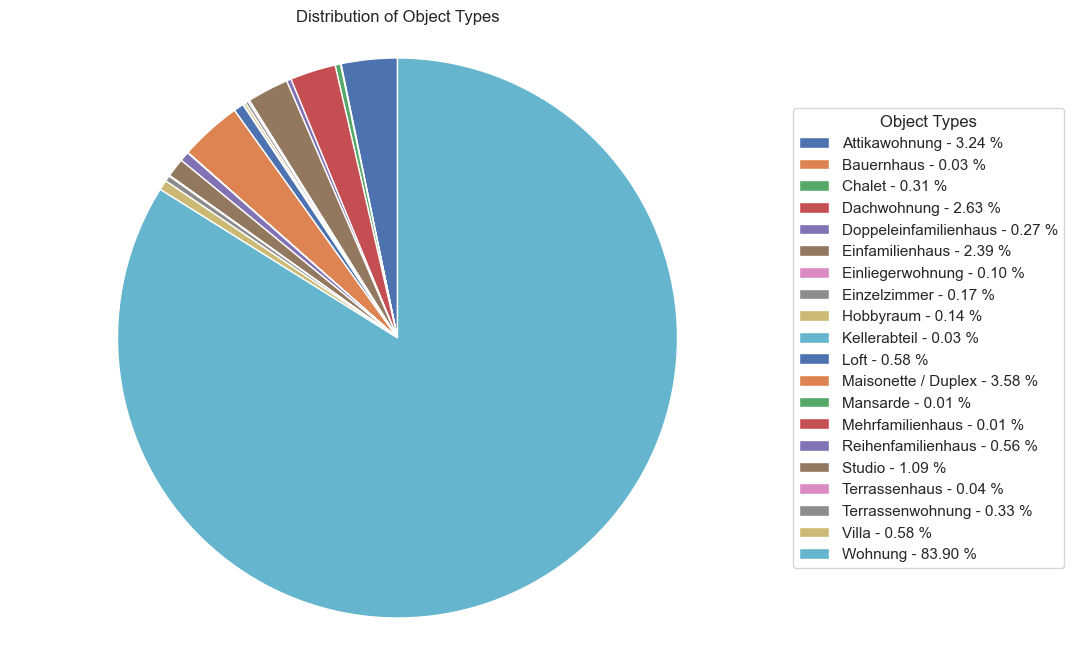

In [5]:
object_type_counts = df_filtered_property_location_clean.groupby('ObjectType').size()

# Calculate percentages
percentages = 100 * object_type_counts / object_type_counts.sum()

# Create labels for the legend with percentages
legend_labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(object_type_counts.index, percentages)]

# Apply Seaborn style
sns.set(style="whitegrid")

# Create a pie chart
plt.figure(figsize=(10, 8))
patches, texts = plt.pie(object_type_counts, labels=None, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Place the legend with the percentages labels
plt.legend(patches, legend_labels, title="Object Types", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Object Types')
plt.show()

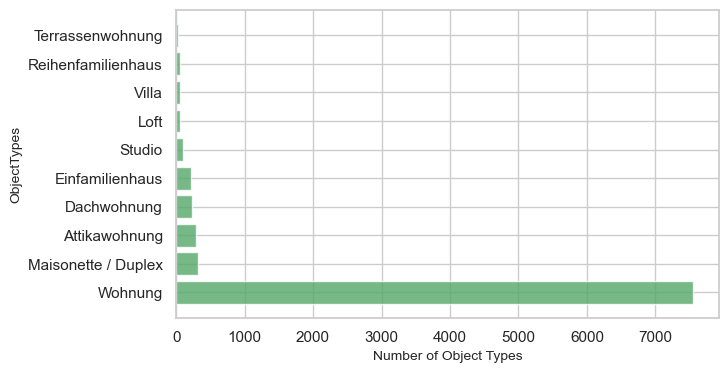

In [10]:
# Barchart top 10 ObjectTypes
#Group data by ObjectType (only the topmost 10 values are shown)
df_bar_property = df_filtered_property_location_clean['ObjectType'].value_counts().nlargest(10).sort_values(ascending=False)

# Values for barchart
napart = list(df_bar_property.values)
index = list(df_bar_property.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of Object Types', fontsize=10)
ax.set_ylabel('ObjectTypes', fontsize=10)

# Show graph
plt.show()

In [11]:
#Extreme values

# Low costs apartments
df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] <= 10]

# Very expensive apartments
df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] >= 100]

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,...,municipality,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
1370,4000857273,2024-03-27 13:52:45,7.5,230.0,NaN,Nach Vereinbarung,Einfamilienhaus,NaN,25000.0,NaN,...,Horw,160.0,145.00,160.0,145.00,1'108,2,0,0,108.695652
1373,4000465081,2024-03-29 22:19:24,1.0,25.0,5,Sofort,Wohnung,NaN,2700.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12'811,10,9,79,108.000000
3919,4000920597,2024-03-24 01:42:30,3.0,36.0,4,Sofort,Dachwohnung,2023-01-01,4120.0,NaN,...,Zürich,99.0,119.00,99.0,119.00,4'779,7,3,27,114.444444
4184,3003168603,2024-03-24 02:44:06,2.0,32.0,NaN,Nach Vereinbarung,Wohnung,NaN,3519.0,129.0,...,Zürich,99.0,119.00,99.0,119.00,4'779,10,1,35,109.968750
4302,3003169151,2024-03-24 03:15:30,2.0,46.0,NaN,Nach Vereinbarung,Wohnung,NaN,5076.0,186.0,...,Zürich,99.0,119.00,99.0,119.00,4'779,7,4,76,110.347826
4303,3003169310,2024-03-24 03:14:31,2.0,37.0,NaN,Nach Vereinbarung,Wohnung,NaN,4142.0,152.0,...,Zürich,99.0,119.00,99.0,119.00,4'779,9,5,126,111.945946
4308,3003168595,2024-03-24 03:17:41,1.0,36.0,NaN,Nach Vereinbarung,Wohnung,NaN,4246.0,156.0,...,Zürich,99.0,119.00,99.0,119.00,4'779,7,4,76,117.944444
7793,4000969668,2024-03-29 13:26:53,2.0,9.0,1,01.08.2024,Einzelzimmer,NaN,900.0,100.0,...,Renens (VD),155.0,77.00,155.0,77.00,7'080,4,2,9,100.000000
8321,4000842714,2024-03-29 18:58:03,1.5,13.0,2,Sofort,Wohnung,2018-01-01,1530.0,NaN,...,Sion,100.0,110.00,100.0,110.00,995,4,0,3,117.692308
8850,4000665076,2024-03-29 22:18:16,1.0,15.0,1,Nach Vereinbarung,Wohnung,NaN,3420.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12'811,12,7,85,228.000000


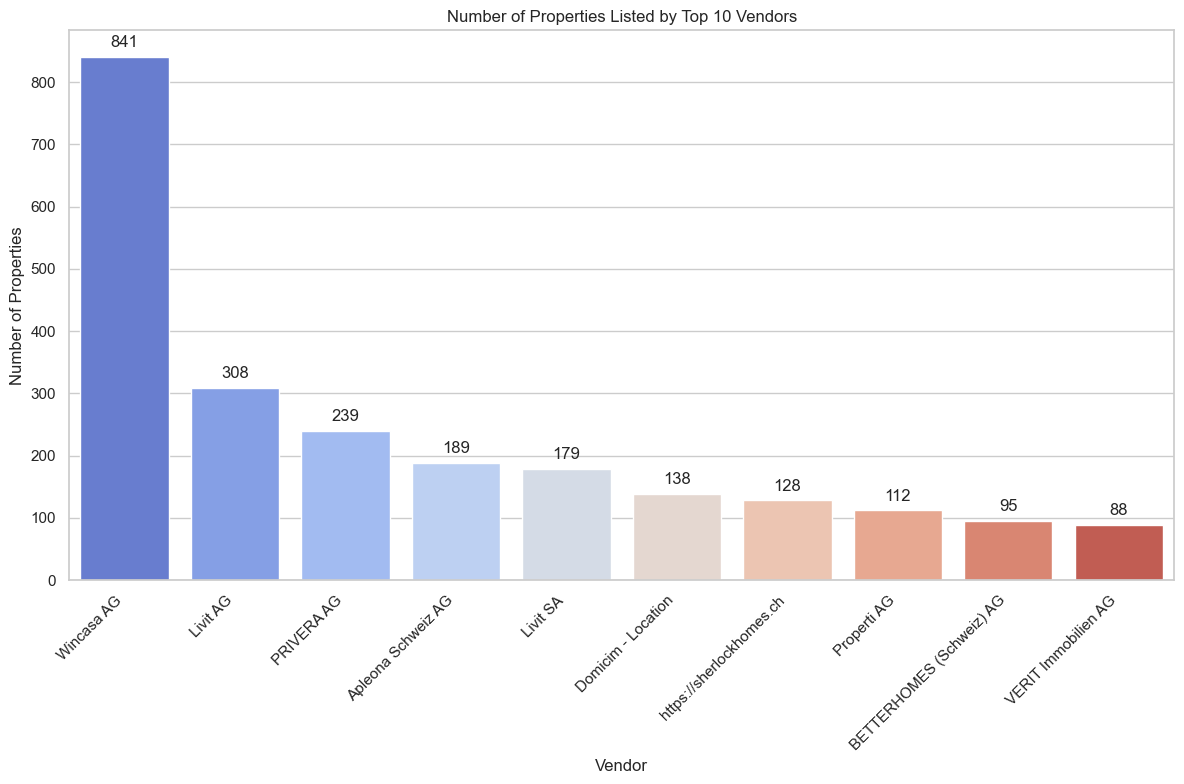

In [12]:
#Count of properties listed by each vendor-only top 10 vendors

# Calculate counts for each vendor
vendor_counts = df_filtered_property_location_clean['Vendor'].value_counts()

# Get the top 10 vendors
top_vendors = vendor_counts.nlargest(10).index

# Filter the DataFrame to include only rows with the top 10 vendors
top_vendors_data = df_filtered_property_location_clean[df_filtered_property_location_clean['Vendor'].isin(top_vendors)]

# Apply Seaborn style
sns.set(style="whitegrid")

# Create a count plot for the 'Vendor' column with only the top 10 vendors
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Vendor', data=top_vendors_data, palette='coolwarm', order=top_vendors)

# Rotate the x labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add a title and labels
plt.title('Number of Properties Listed by Top 10 Vendors')
plt.xlabel('Vendor')
plt.ylabel('Number of Properties')

# Optional: Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit the rotated x labels
plt.show()

In [13]:
#Multivariate non-graphical exploratory data analysis (EDA)
#Cross-tabulation
pd.crosstab(df_filtered_property_location_clean['SquareMeter'], df_filtered_property_location_clean['Price'])


Price,140.0,200.0,250.0,260.0,290.0,300.0,399.0,400.0,425.0,450.0,...,13000.0,13250.0,13600.0,14000.0,14500.0,15000.0,16000.0,18000.0,20000.0,25000.0
SquareMeter,,,,,,,,,,,,,,,,,,,,,
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11.0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [14]:
# Crosstab of Rooms and Price (assuming 'Price' is categorized or binned for better visualization)
price_bins = pd.cut(df_filtered_property_location_clean['Price'], bins=8)  # Bins prices into 5 categories
rooms_vs_price = pd.crosstab(df_filtered_property_location_clean['Rooms'], price_bins)

# Display the crosstab
print(rooms_vs_price)

Price  (115.14, 3247.5]  (3247.5, 6355.0]  (6355.0, 9462.5]  \
Rooms                                                         
1.0                 332                 7                 0   
1.5                 270                 0                 0   
2.0                 415                19                 1   
2.5                1230                34                 0   
3.0                 737                18                 2   
3.5                2392               106                 6   
4.0                 438                55                 1   
4.5                1781               174                20   
5.0                  92                53                 4   
5.5                 322               108                13   
6.0                  30                43                 8   
6.5                  48                51                12   
7.0                   9                18                11   
7.5                   9                24              

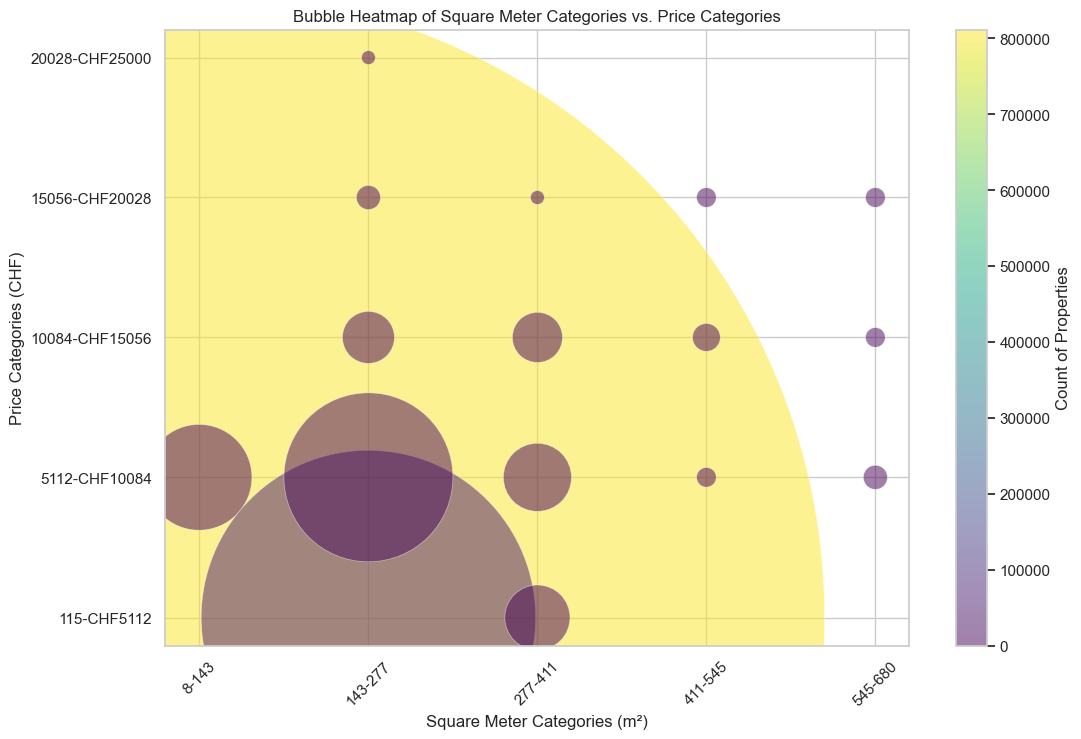

In [24]:
# Bin both SquareMeter and Price for a more manageable visualization
square_meter_bins = pd.cut(df_filtered_property_location_clean['SquareMeter'], bins=5)
price_bins = pd.cut(df_filtered_property_location_clean['Price'], bins=5)

# Create the crosstab
area_vs_price = pd.crosstab(square_meter_bins, price_bins)

# Obtain the mid values of each bin for accurate plotting
square_mid = [bin.mid for bin in square_meter_bins.cat.categories]
price_mid = [bin.mid for bin in price_bins.cat.categories]

# Generate coordinates for square meters and prices
square_meters = np.repeat(square_mid, len(price_mid))
prices = np.tile(price_mid, len(square_mid))

# Sizes for the bubbles based on the crosstab counts, scaled for better visualization
sizes = area_vs_price.values.flatten() * 100

# Create the bubble heatmap (scatter plot)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(square_meters, prices, s=sizes, alpha=0.5, cmap='viridis', c=sizes, edgecolors='w', linewidths=0.5)

# Create a color bar
plt.colorbar(scatter, label='Count of Properties')

# Add titles and labels
plt.title('Bubble Heatmap of Square Meter Categories vs. Price Categories')
plt.xlabel('Square Meter Categories (m²)')
plt.ylabel('Price Categories (CHF)')
plt.xticks(ticks=square_mid, labels=[f'{int(cat.left)}-{int(cat.right)}' for cat in square_meter_bins.cat.categories], rotation=45)
plt.yticks(ticks=price_mid, labels=[f'{int(cat.left)}-CHF{int(cat.right)}' for cat in price_bins.cat.categories])

# Show the plot
plt.show()

In [27]:
#Heatmap erstellen mit longitude, latitude, Price - Price ist das Gewicht für jeden Punkt - Orte mit höheren Preisen sind intensiver gefärbt 
#Bereiche mit hoher Konzentration an teuren Immobilien sind intensiver gefärbt 
#(Skalierung Preis: Wenn die Preisunterschiede gross sind, könnten einige Bereiche übermässig hervorgehoben werden, während andere unterrepräsentiert bleiben (Normalisierung oder Standardisierung des Preises allenfalls sinnvoll)
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), df_filtered_property_location_clean['longitude'].mean()], zoom_start=12)

# Erstelle Daten für die Heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

# Füge die Heatmap zum Map-Objekt hinzu
HeatMap(heat_data).add_to(map)

# Optional: Füge Marker mit Tooltips hinzu
for index, row in df_filtered_property_location_clean.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"<strong>Preis:</strong> {row['Price']} CHF<br><strong>Zimmer:</strong> {row['Rooms']}<br><strong>Quadratmeter:</strong> {row['SquareMeter']} m²",
        tooltip=f"Klicke für mehr Infos"
    ).add_to(map)

# Speichere oder zeige die Karte an
map.save('Heatmap.html')
#map

In [3]:
#Heatmap erstellen mit longitude, latitude, Price - Price ist das Gewicht für jeden Punkt - Orte mit höheren Preisen sind intensiver gefärbt 
#Bereiche mit hoher Konzentration an teuren Immobilien sind intensiver gefärbt 
#(Skalierung Preis: Wenn die Preisunterschiede gross sind, könnten einige Bereiche übermässig hervorgehoben werden, während andere unterrepräsentiert bleiben (Normalisierung oder Standardisierung des Preises allenfalls sinnvoll)
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), df_filtered_property_location_clean['longitude'].mean()], zoom_start=12)

# Erstelle Daten für die Heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

# Füge die Heatmap zum Map-Objekt hinzu
HeatMap(heat_data).add_to(map)

# Speichere oder zeige die Karte an
#map.save('Heatmap.html')
map

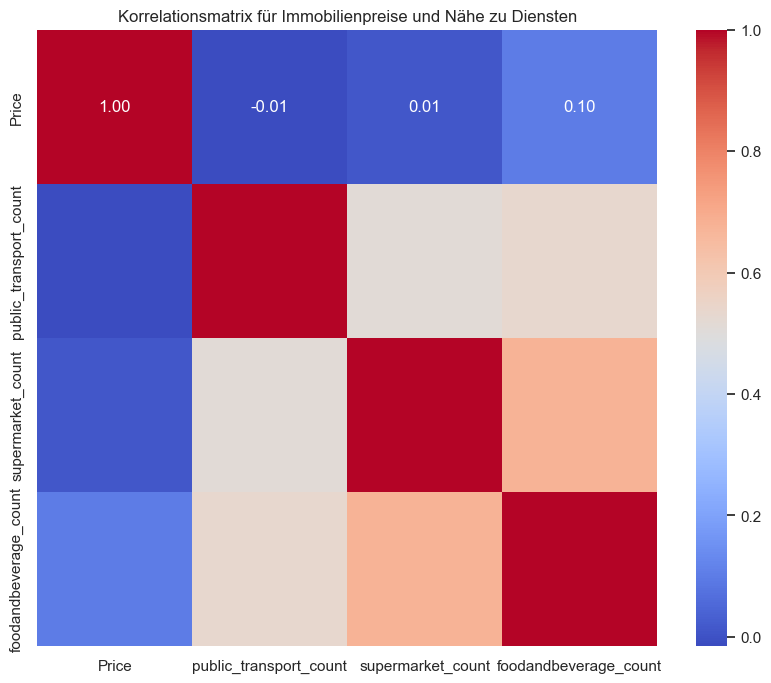

In [28]:
df_filtered_property_location_clean.dropna(subset=['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count'], inplace=True)

# Berechnung der Korrelationsmatrix
correlation_matrix = df_filtered_property_location_clean[['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count']].corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korrelationsmatrix für Immobilienpreise und Nähe zu Diensten')
plt.show()

In [ ]:
#weitere Beispiele EDA: 
#https://github.com/aberweger/Explorative_Data_Analysis_and_Visualization/blob/master/exploratory_data_analysis_apartments_data.ipynb
#https://seaborn.pydata.org/archive/0.11/generated/seaborn.barplot.html
#https://medium.com/analytics-vidhya/apartment-market-web-scrapping-and-eda-using-python-a9eacf6d64e2
#https://www.kaggle.com/code/dgawlik/house-prices-eda
